In [45]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

visualizing data
generate dataset for training

In [46]:
image_size = [224, 224, 3] # fix image size

In [47]:
train_dir = 'dataset/train/' #training dataset folder
test_dir = 'dataset/val/' #testing dataset folder

In [48]:
train_data_gen = ImageDataGenerator(rescale=1. / 225)
test_data_gen = ImageDataGenerator(rescale=1. / 225 )

In [49]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(120,120), class_mode='categorical', batch_size=16)
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(120,120), class_mode='categorical', batch_size=16)

Found 360 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


building deep learning model using pre trained weights 

In [50]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=image_size)

In [51]:
for layer in vgg.layers:
    layer.trainable = False

In [52]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [54]:
model = Sequential([
    vgg,
    GlobalAveragePooling2D(),
    Dense(200, activation='relu'),
    Dense(3, activation='softmax')
])

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 200)               102600    
                                                                 
 dense_7 (Dense)             (None, 3)                 603       
                                                                 
Total params: 14,817,891
Trainable params: 103,203
Non-trainable params: 14,714,688
_________________________________________________________________


In [56]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_data, 
    validation_data=test_data, 
    epochs=10,
)

Epoch 1/10
23/23 [==============================] - 18s 762ms/step - loss: 0.9286 - accuracy: 0.5917 - val_loss: 0.7957 - val_accuracy: 0.6556
Epoch 2/10
23/23 [==============================] - 21s 933ms/step - loss: 0.6501 - accuracy: 0.7861 - val_loss: 0.6057 - val_accuracy: 0.8111
Epoch 3/10
23/23 [==============================] - 20s 887ms/step - loss: 0.5512 - accuracy: 0.7861 - val_loss: 0.6071 - val_accuracy: 0.7667
Epoch 4/10
23/23 [==============================] - 21s 890ms/step - loss: 0.4387 - accuracy: 0.8667 - val_loss: 0.4799 - val_accuracy: 0.8222
Epoch 5/10
23/23 [==============================] - 20s 884ms/step - loss: 0.3840 - accuracy: 0.8583 - val_loss: 0.4655 - val_accuracy: 0.8222
Epoch 6/10
23/23 [==============================] - 21s 902ms/step - loss: 0.3432 - accuracy: 0.8917 - val_loss: 0.3631 - val_accuracy: 0.8444
Epoch 7/10
23/23 [==============================] - 20s 871ms/step - loss: 0.2874 - accuracy: 0.9139 - val_loss: 0.3440 - val_accuracy: 0.8889

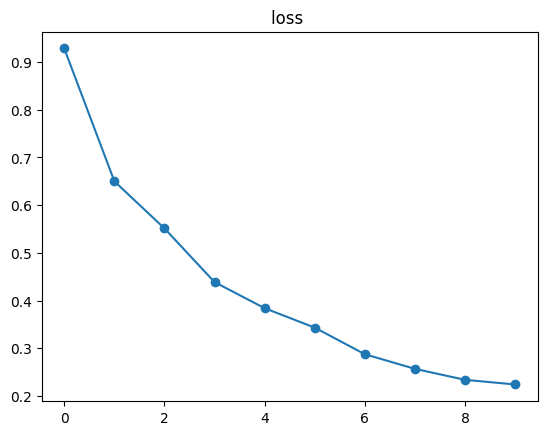

In [64]:
plt.title('loss ')
plt.plot(history.history['loss'], marker='o')

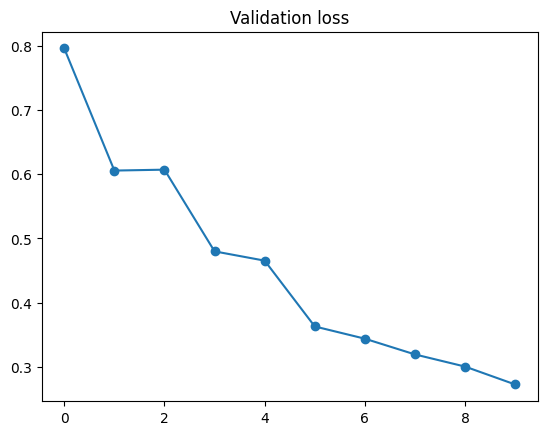

In [63]:
plt.title('Validation loss')
plt.plot(history.history['val_loss'], marker = 'o')

building a custom deep learning model 

In [60]:
model.save('vgg16_epochs_10.h5')